# Hackaton Prédiction - JO 2024

In [1]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

### ATHLETES - olympic_athletes.json

In [2]:
# Lire le fichier JSON
olympic_athlete = pd.read_json('./files/olympic_athletes.json')

In [3]:
# Afficher les premières lignes du DataFrame
olympic_athlete.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,None,None
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,None,None
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,None,None
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,None,None
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,None,None


In [4]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_athlete.shape[0]) + ' lignes et ' + str(olympic_athlete.shape[1]) + ' colonnes')

Il y a 75904 lignes et 7 colonnes


In [5]:
olympic_athlete.isnull().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64

In [6]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_athlete.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


### Résultats - olympic_results.html

In [7]:
# Lire les tables du fichier HTML
olympic_results = pd.read_html('./files/olympic_results.html')[0]

In [8]:
# Afficher la première table (si le fichier contient plusieurs tables)
olympic_results.head()

,Unnamed: 0,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


In [9]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_results.shape[0]) + ' lignes et ' + str(olympic_results.shape[1]) + ' colonnes')

Il y a 162804 lignes et 16 colonnes


In [10]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_results.isnull().sum()

Unnamed: 0                    0
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130278
rank_position              3878
country_name                  0
country_code               5036
country_3_letter_code         0
athlete_url               32813
athlete_full_name         21158
value_unit                84158
value_type                72755
dtype: int64

In [11]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_results.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


In [12]:
olympic_results.value_unit.unique()

array([nan, '76.74', '78.87', ..., '7.355', '2.333', '142 pts'],
      dtype=object)

In [13]:
olympic_results.value_type.unique()

array([nan, 'POINTS', 'SC_REST$IRM', 'IRM', 'CODE', 'TIME', 'NO_TIME',
       'IRM_POINTS', 'STROKES', 'WEIGHT', 'DISTANCE', 'RANK', 'SCORE'],
      dtype=object)

In [14]:
# On supprimer les colonnes inutiles : 
olympic_results.drop(['Unnamed: 0', 'athlete_url'], axis=1, inplace=True)
olympic_results = olympic_results.rename({'slug_game':'game_slug'},axis=1)
olympic_results.columns

Index(['discipline_title', 'event_title', 'game_slug', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_full_name',
       'value_unit', 'value_type'],
      dtype='object')

### Médailles - olympic_medals.xlsx

In [15]:
# Lire le fichier Excel
olympic_medals = pd.read_excel('./files/olympic_medals.xlsx')

# Afficher les premières lignes du DataFrame
olympic_medals.head()

,Unnamed: 0,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [16]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_medals.shape[0]) + ' lignes et ' + str(olympic_medals.shape[1]) + ' colonnes')

Il y a 21697 lignes et 13 colonnes


In [17]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_medals.isnull().sum()

Unnamed: 0                   0
discipline_title             0
slug_game                    0
event_title                  0
event_gender                 0
medal_type                   0
participant_type             0
participant_title        15113
athlete_url               4670
athlete_full_name         3624
country_name                 0
country_code              1502
country_3_letter_code        0
dtype: int64

In [18]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_medals.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


In [19]:
# On renomme la colonne slug_game en game_slug pour les futures merges des autres DF
olympic_medals = olympic_medals.rename({'slug_game':'game_slug'},axis=1)
olympic_medals.columns

Index(['Unnamed: 0', 'discipline_title', 'game_slug', 'event_title',
       'event_gender', 'medal_type', 'participant_type', 'participant_title',
       'athlete_url', 'athlete_full_name', 'country_name', 'country_code',
       'country_3_letter_code'],
      dtype='object')

In [20]:
# On observe si le colonne participant_title possède des données viables
olympic_medals.participant_title.unique()

array(['Italy', 'Norway', 'Sweden', 'Great Britain', 'Japan', 'Canada',
       nan, 'United States', 'China', 'Republic of Korea',
       "People's Republic of China", 'Hungary', 'Netherlands',
       'United States of America 1', 'Italy 1', 'Canada 1', 'Austria',
       'Slovenia', 'Germany', 'ROC', 'United States of America',
       'SUI Wenjing / HAN Cong', 'TARASOVA Evgenia / MOROZOV Vladimir',
       'MISHINA Anastasia / GALLIAMOV Aleksandr',
       'PAPADAKIS Gabriella / CIZERON Guillaume',
       'SINITSINA Victoria / KATSALAPOV Nikita',
       'HUBBELL Madison / DONOHUE Zachary', 'Latvia',
       'WENDL Tobias / ARLT Tobias', 'EGGERT Toni / BENECKEN Sascha',
       'STEU Thomas / KOLLER Lorenz', 'Finland', 'Slovakia', 'France',
       'Spain', 'San Marino', "People's Republic of China 1", 'ROC 2',
       'ROC 1', 'Ukraine', 'Mexico', 'Cuba', 'Australia',
       'Czech Republic', 'Belarus', 'Poland', 'New Zealand', 'Brazil',
       'Denmark', 'Fiji', 'Argentina', 'Hong Kong, Chi

In [21]:
# Suppression des colonnes inutilisables/inutiles : 
olympic_medals.drop(['Unnamed: 0','participant_title', 'athlete_url'], axis=1, inplace=True)

In [22]:
olympic_medals.tail()

,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,Viggo JENSEN,Denmark,DK,DEN
21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,Alexandros Nikolopoulos,Greece,GR,GRE
21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,Viggo JENSEN,Denmark,DK,DEN
21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,Launceston ELLIOT,Great Britain,GB,GBR
21696,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,BRONZE,Athlete,Sotirios VERSIS,Greece,GR,GRE


### Hôtes - olympic_hosts.xml

In [23]:
# Lire le fichier XML
olympic_hosts = pd.read_xml('./files/olympic_hosts.xml')

# Afficher les premières lignes du DataFrame
olympic_hosts.head()

,index,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


In [24]:
# Combien de lignes ? Combien de colonnes ?
print('Il y a ' + str(olympic_hosts.shape[0]) + ' lignes et ' + str(olympic_hosts.shape[1]) + ' colonnes')

Il y a 53 lignes et 8 colonnes


In [25]:
# On supprime les colonnes inutilisables
olympic_hosts.drop(['index'], axis=1, inplace=True)

In [26]:
# Afficher le nombre de données manquantes pour chaque colonne
olympic_hosts.isnull().sum()

game_slug          0
game_end_date      0
game_start_date    0
game_location      0
game_name          0
game_season        0
game_year          0
dtype: int64

In [27]:
# Y a-t'il des lignes dupliquée ? Si oui, les supprimer
print('Il y a ' + str(olympic_hosts.duplicated().sum()) + ' ligne(s) dupliquée(s)')

Il y a 0 ligne(s) dupliquée(s)


## Réponses aux questions

#### 1. La France a organisé 6 JO : 3 d’hiver et 3 d’été (en comptant celui de 2024) ?

In [28]:
jo_france = olympic_hosts[olympic_hosts['game_location'] == 'France']
jo_france

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
16,albertville-1992,1992-02-23T19:00:00Z,1992-02-08T07:00:00Z,France,Albertville 1992,Winter,1992
28,grenoble-1968,1968-02-18T19:00:00Z,1968-02-06T07:00:00Z,France,Grenoble 1968,Winter,1968
45,paris-1924,1924-07-27T19:00:00Z,1924-05-04T07:00:00Z,France,Paris 1924,Summer,1924
46,chamonix-1924,1924-02-05T20:00:00Z,1924-01-25T08:00:00Z,France,Chamonix 1924,Winter,1924
51,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900


In [29]:
# On compte le nombre de JO organisé par la France en fonction de la saison (winter/summer)
jo_france.groupby('game_season').size()


game_season
Summer    2
Winter    3
dtype: int64

La réponse est oui en comptant les JO d'été de 2024

#### 2. La France est le 2è pays qui a organisé le plus de JO après les USA (8 JO) ?

In [30]:
# La France est le 2è pays qui a organisé le plus de JO après les USA (8 JO) ?
olympic_hosts.groupby('game_location').size().sort_values(ascending=False)

game_location
United States                  8
France                         5
Japan                          4
Italy                          3
Canada                         3
Great Britain                  3
Greece                         2
Germany                        2
Republic of Korea              2
Norway                         2
Switzerland                    2
China                          2
Austria                        2
USSR                           1
Spain                          1
Russian Federation             1
Sweden                         1
Australia                      1
Netherlands                    1
Mexico                         1
Australia, Sweden              1
Finland                        1
Federal Republic of Germany    1
Brazil                         1
Belgium                        1
Yugoslavia                     1
dtype: int64

La réponse est oui, en comptant les JO 2024 on est à 6 exactement

#### 3. Les JO d’hiver sont nés à Chamonix en 1924 ?

In [31]:
# Les JO d’hiver sont nés à Chamonix en 1924 ?
olympic_hosts[olympic_hosts['game_season'] == 'Winter'].sort_values('game_year').head(3)

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
46,chamonix-1924,1924-02-05T20:00:00Z,1924-01-25T08:00:00Z,France,Chamonix 1924,Winter,1924
44,st-moritz-1928,1928-02-19T08:00:00Z,1928-02-11T08:00:00Z,Switzerland,St. Moritz 1928,Winter,1928
42,lake-placid-1932,1932-02-15T18:00:00Z,1932-02-04T13:00:00Z,United States,Lake Placid 1932,Winter,1932


La réponse est oui

#### 4. JO de Paris, en 1900 : les femmes peuvent participer aux JO ?

In [32]:
# On vérifie si la France a déjà organisé des JO en 1900
olympic_hosts[olympic_hosts['game_location'] == 'France']

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
16,albertville-1992,1992-02-23T19:00:00Z,1992-02-08T07:00:00Z,France,Albertville 1992,Winter,1992
28,grenoble-1968,1968-02-18T19:00:00Z,1968-02-06T07:00:00Z,France,Grenoble 1968,Winter,1968
45,paris-1924,1924-07-27T19:00:00Z,1924-05-04T07:00:00Z,France,Paris 1924,Summer,1924
46,chamonix-1924,1924-02-05T20:00:00Z,1924-01-25T08:00:00Z,France,Chamonix 1924,Winter,1924
51,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900


In [33]:
# On merge olympic_hosts avec olympic_medals pour obtenir les résultats des JO de Paris en 1924
jo_paris_1924 = pd.merge(olympic_hosts, olympic_medals, on='game_slug')

In [34]:
# Maintenant on regarde les valeurs unique de 'event_title' en fonction de 'game_year' (1924)
jo_paris_1924[jo_paris_1924['game_year'] == 1924]['event_gender'].unique()

array(['Men', 'Women', 'Mixed', 'Open'], dtype=object)

La réponse est donc oui, les femmes sont dans la liste des gender avec la mention 'women'

#### 5. Seuls 4 athlètes ont remporté des médailles à la fois aux JO d’hiver et d’été. Une seule d’entre eux, Christa Ludinger-Rothenburger, a remporté des médailles au cours de la même année ?

In [35]:
olympic_medals.head()

,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Almida DE VAL,Sweden,SE,SWE


In [36]:
# Seuls 4 athlètes ont remporté des médailles à la fois aux JO d’hiver et d’été. Une seule d’entre eux, Christa Ludinger-Rothenburger, a remporté des médailles au cours de la même année ?

# On vérifie dans le DF des médailles si Christa Ludinger-Rothenburger a remporté des médailles aux JO (attention au case sensitive)
olympic_medals[olympic_medals['athlete_full_name'] == 'Christa LUDING-ROTHENBURGER']

,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
10448,Speed skating,albertville-1992,500m women,Women,BRONZE,Athlete,Christa LUDING-ROTHENBURGER,Germany,DE,GER
10930,Cycling Track,seoul-1988,sprint women,Women,SILVER,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
11445,Speed skating,calgary-1988,500m women,Women,SILVER,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
11450,Speed skating,calgary-1988,1000m women,Women,GOLD,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
12306,Speed skating,sarajevo-1984,500m women,Women,GOLD,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR


In [37]:
# On merge olympic_hosts avec olympic_medals pour obtenir les saisons des JO où Christa Ludinger-Rothenburger a remporté des médailles
jo_christa = pd.merge(olympic_hosts, olympic_medals, on='game_slug')

In [38]:
jo_christa[jo_christa['athlete_full_name'] == 'Christa LUDING-ROTHENBURGER']

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,discipline_title,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
10448,albertville-1992,1992-02-23T19:00:00Z,1992-02-08T07:00:00Z,France,Albertville 1992,Winter,1992,Speed skating,500m women,Women,BRONZE,Athlete,Christa LUDING-ROTHENBURGER,Germany,DE,GER
10930,seoul-1988,1988-10-02T10:00:00Z,1988-09-16T22:00:00Z,Republic of Korea,Seoul 1988,Summer,1988,Cycling Track,sprint women,Women,SILVER,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
11445,calgary-1988,1988-02-28T03:00:00Z,1988-02-13T15:00:00Z,Canada,Calgary 1988,Winter,1988,Speed skating,500m women,Women,SILVER,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
11450,calgary-1988,1988-02-28T03:00:00Z,1988-02-13T15:00:00Z,Canada,Calgary 1988,Winter,1988,Speed skating,1000m women,Women,GOLD,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR
12306,sarajevo-1984,1984-02-19T19:00:00Z,1984-02-08T07:00:00Z,Yugoslavia,Sarajevo 1984,Winter,1984,Speed skating,500m women,Women,GOLD,Athlete,Christa LUDING-ROTHENBURGER,German Democratic Republic (Germany),DDDE,GDR


La réponse est oui, Crista LUDING-ROTHENBURGER à remporter en 1988 : 1 médaille en été et 2 médaille en hiver

#### 6. De 1924 à 1992, les JO d’hiver et d’été avaient lieu au cours de la même année. Désormais, ils sont organisés selon des cycles distincts avec une alternance de 2 ans ?

In [39]:
# On vérifie si les JO d'hiver et d'été ont eu lieu la même année entre 1924 et 1992
olympic_hosts[(olympic_hosts['game_year'] >= 1924) & (olympic_hosts['game_year'] <= 1992)].groupby('game_year').size()

game_year
1924    2
1928    2
1932    2
1936    2
1948    2
1952    2
1956    2
1960    2
1964    2
1968    2
1972    2
1976    2
1980    2
1984    2
1988    2
1992    2
dtype: int64

In [40]:
# On vérifie si les JO d'hiver et d'été ont eu lieu la même année après 1992
olympic_hosts[olympic_hosts['game_year'] > 1992].groupby('game_year').size()

game_year
1994    1
1996    1
1998    1
2000    1
2002    1
2004    1
2006    1
2008    1
2010    1
2012    1
2014    1
2016    1
2018    1
2020    1
2022    1
dtype: int64

La réponse est oui, on peut voir que de 1924 à 1992 les JO d'hiver et d'été se passe en même temps, puis après il y un seul JO par année

#### 7. Tarzan lui-même a participé aux JO. En effet, Johnny Weissmuller, ancien athlète devenu acteur et ayant interprété 12 films de Tarzan, a remporté 5 médailles d’or en natation dans les années 1920 ?

In [41]:
# On vérifie dans le DF des médailles si Johnny Weissmuller a remporté des médailles aux JO
olympic_medals[olympic_medals['athlete_full_name'] == 'Johnny WEISSMULLER']

,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,athlete_full_name,country_name,country_code,country_3_letter_code
19156,Swimming,amsterdam-1928,100m freestyle men,Men,GOLD,Athlete,Johnny WEISSMULLER,United States of America,US,USA
19593,Swimming,paris-1924,400m freestyle men,Men,GOLD,Athlete,Johnny WEISSMULLER,United States of America,US,USA
19605,Swimming,paris-1924,100m freestyle men,Men,GOLD,Athlete,Johnny WEISSMULLER,United States of America,US,USA


In [42]:
#  On vérifie également dans le DF résultats si Johnny Weissmuller a remporté des médailles aux JO
olympic_results[olympic_results['athlete_full_name'] == 'Johnny WEISSMULLER']

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_full_name,value_unit,value_type
148327,Swimming,100m freestyle men,amsterdam-1928,Athlete,GOLD,NaN,NaN,1,United States of America,US,USA,Johnny WEISSMULLER,58600,TIME
151522,Swimming,400m freestyle men,paris-1924,Athlete,GOLD,NaN,NaN,1,United States of America,US,USA,Johnny WEISSMULLER,304200,TIME
151557,Swimming,100m freestyle men,paris-1924,Athlete,GOLD,NaN,NaN,1,United States of America,US,USA,Johnny WEISSMULLER,59000,TIME


La réponse est non, Johnny WEISSMULLER a bien gagner des médailles aux JO mais seulement 3 (pas 5)

#### 8. Les JO de Londres de 2012 ont été les 1ers JO durant lesquels tous les pays participants ont envoyé des athlètes de sexe féminin ?

In [43]:
olympic_results.head()

,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_full_name,value_unit,value_type
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN


In [44]:
#### 8. Les JO de Londres de 2012 ont été les 1ers JO durant lesquels tous les pays participants ont envoyé des athlètes de sexe féminin ?

# On merge olympic_hosts avec olympic_results pour obtenir l'année 'game_year' en fonction de 'game_slug' dans le DF olympic_results
jo_years = pd.merge(olympic_hosts, olympic_results, on='game_slug')

# Pour chaque country_code (pays), on regarde 
# jo_years['country_code'].unique()

# Machine Learning

#### Préparation des données générales pour les prédictions des JO d'été 2024 (on utilisera le DF results plutôt que medals car plus de résultats)

In [45]:
# Fusionner les DataFrames sur la colonne 'slug_game'
olympic_data = olympic_results.merge(olympic_hosts, left_on='game_slug', right_on='game_slug')

# Filtrer les données pour les Jeux Olympiques d'été
summer_olympics = olympic_data[olympic_data['game_season'] == 'Summer']

### Nombre de médaille d’Or, d’Argent et de Bronze qui seront gagné par la France ?

#### Préparation des données

In [46]:
# Filtrer pour les médailles remportées par la France
france_medals = summer_olympics[summer_olympics['country_name'] == 'France']

# Garder uniquement les colonnes pertinentes
france_medals = france_medals[['discipline_title', 'event_title', 'game_slug', 'medal_type', 'game_year']]

#### Agrégation des données

In [47]:
# Agréger les données pour obtenir le nombre de médailles par type chaque année
medals_by_year = france_medals.groupby(['game_year', 'medal_type']).size().unstack(fill_value=0)
medals_by_year.reset_index(inplace=True)

# Renommer les colonnes pour une meilleure compréhension
medals_by_year.columns = ['Year', 'Bronze', 'Gold', 'Silver']


#### Modélisation

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Préparer les données pour la modélisation
X = medals_by_year[['Year']]
y_gold = medals_by_year['Gold']
y_silver = medals_by_year['Silver']
y_bronze = medals_by_year['Bronze']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_gold_train, y_gold_test = train_test_split(X, y_gold, test_size=0.2, random_state=42)
_, _, y_silver_train, y_silver_test = train_test_split(X, y_silver, test_size=0.2, random_state=42)
_, _, y_bronze_train, y_bronze_test = train_test_split(X, y_bronze, test_size=0.2, random_state=42)

# Modèles de régression linéaire
model_gold = LinearRegression()
model_silver = LinearRegression()
model_bronze = LinearRegression()

# Entraîner les modèles
model_gold.fit(X_train, y_gold_train)
model_silver.fit(X_train, y_silver_train)
model_bronze.fit(X_train, y_bronze_train)

# Prédire sur l'ensemble de test
y_gold_pred = model_gold.predict(X_test)
y_silver_pred = model_silver.predict(X_test)
y_bronze_pred = model_bronze.predict(X_test)

# Évaluer les modèles
mae_gold = mean_absolute_error(y_gold_test, y_gold_pred)
mae_silver = mean_absolute_error(y_silver_test, y_silver_pred)
mae_bronze = mean_absolute_error(y_bronze_test, y_bronze_pred)

mae_gold, mae_silver, mae_bronze

(3.741199109037471, 4.958990681797215, 3.7357623924189105)

#### Prédiction pour les JO 2024

In [49]:
# Prédire le nombre de médailles pour 2024
year_2024 = pd.DataFrame({'Year': [2024]})
gold_2024 = model_gold.predict(year_2024)
silver_2024 = model_silver.predict(year_2024)
bronze_2024 = model_bronze.predict(year_2024)

print('Le nombre de médailles d\'or prédit pour la France en 2024 est de', int(gold_2024[0]))
print('Le nombre de médailles d\'argent prédit pour la France en 2024 est de', int(silver_2024[0]))
print('Le nombre de médailles de bronze prédit pour la France en 2024 est de', int(bronze_2024[0]))

Le nombre de médailles d'or prédit pour la France en 2024 est de 7
Le nombre de médailles d'argent prédit pour la France en 2024 est de 7
Le nombre de médailles de bronze prédit pour la France en 2024 est de 11


### Le nombre de médaille d’Or, d’Argent et de Bronze qui seront gagnés par le Top 25 des pays participants ?

#### Préparation des données

In [58]:
# Agréger les données pour obtenir le nombre de médailles par pays et par année
medals_by_country = summer_olympics.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0)

# Supprimer les pays qui n'existent plus / ne participent plus
medals_by_country = medals_by_country.drop(['Soviet Union', 'German Democratic Republic (Germany)'], errors='ignore')

# Calculer le nombre total de médailles
medals_by_country['Total'] = medals_by_country.sum(axis=1)

# Trier et sélectionner les 25 premiers pays
top_25_countries = medals_by_country.sort_values('Total', ascending=False).head(25)

# Afficher les 25 premiers pays (en fonction du nombre total de médailles)
top_25_countries

medal_type,BRONZE,GOLD,SILVER,Total
country_name,,,,
United States of America,737,1058,832,2627
Great Britain,312,282,317,911
Germany,277,225,257,759
France,275,220,247,742
People's Republic of China,173,262,199,634
Italy,212,216,186,614
Australia,209,164,173,546
Hungary,175,181,153,509
Japan,178,169,149,496


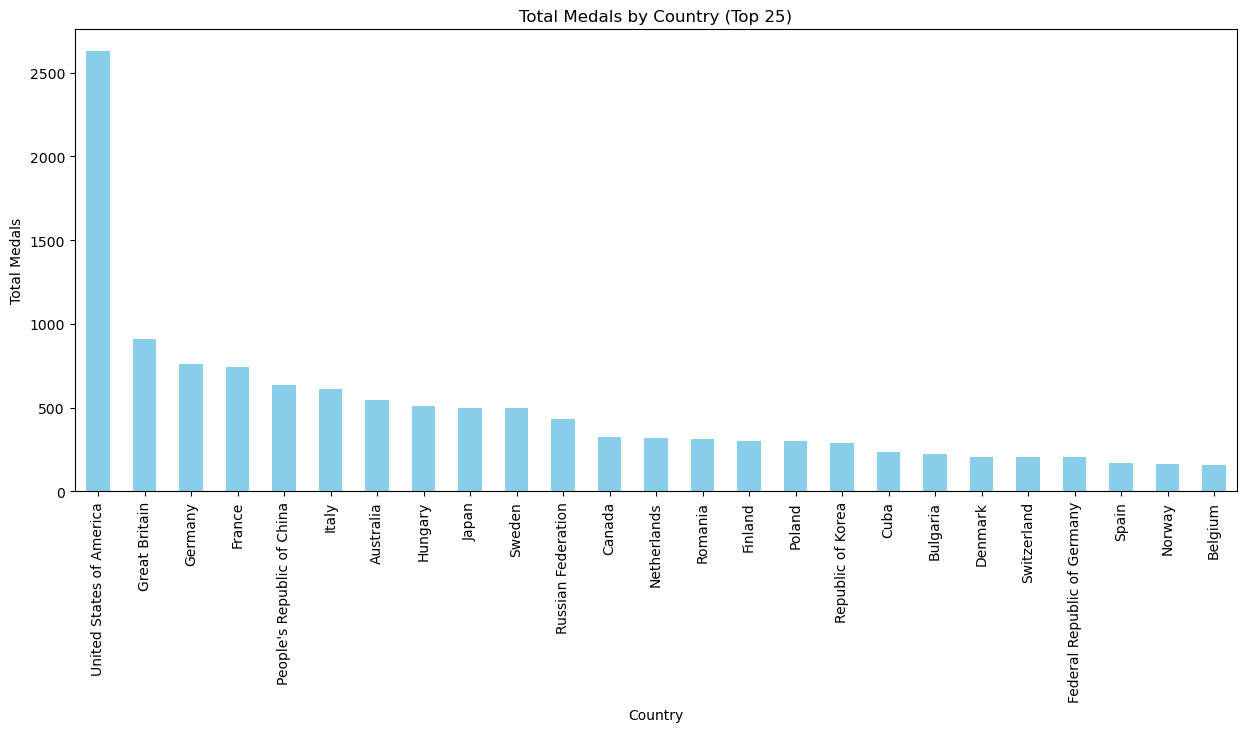

In [59]:
import matplotlib.pyplot as plt

# Créer un graphique à barres pour les 25 premiers pays
top_25_countries .plot(kind='bar', y='Total', figsize=(15, 6), color='skyblue', legend=False)
plt.title('Total Medals by Country (Top 25)')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

#### Agrégation des données

In [60]:
# Filtrer les données pour ne garder que les pays du Top 25
top_25_summer_olympics = summer_olympics[summer_olympics['country_name'].isin(top_25_countries.index)]

# Agréger les données pour obtenir le nombre de médailles par pays et par année
medals_by_year = top_25_summer_olympics.groupby(['game_year', 'country_name', 'medal_type']).size().unstack(fill_value=0).reset_index()

# Ajouter des colonnes pour les totaux de médailles
medals_by_year['Total'] = medals_by_year[['GOLD', 'SILVER', 'BRONZE']].sum(axis=1)

# Afficher les premières lignes pour vérifier
medals_by_year.head()


medal_type,game_year,country_name,BRONZE,GOLD,SILVER,Total
0,1896,Australia,0,2,0,2
1,1896,Denmark,3,1,2,6
2,1896,France,2,5,4,11
3,1896,Germany,2,6,5,13
4,1896,Great Britain,2,2,3,7


#### Modélisation

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fonction pour entraîner et prédire avec un modèle donné
def train_and_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

# Séparer les caractéristiques et la cible pour chaque type de médaille
features = medals_by_year[['game_year', 'country_name']]
targets = medals_by_year[['GOLD', 'SILVER', 'BRONZE']]

# Créer des variables fictives pour les pays
features = pd.get_dummies(features, columns=['country_name'], drop_first=True)

# Séparer les données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Initialiser les modèles
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'RidgeRegression': Ridge()
}

# Préparer les données pour les prédictions pour les JO de Paris 2024
paris_2024_base = pd.DataFrame({'game_year': [2024]*25, 'country_name': top_25_countries.index})
paris_2024_base = pd.get_dummies(paris_2024_base, columns=['country_name'], drop_first=True)
paris_2024_base = paris_2024_base.reindex(columns=features.columns, fill_value=0)

# Dictionnaire pour stocker les résultats des modèles
predictions = {}

for name, model in models.items():
    # Créer une copie de base pour les prédictions pour chaque modèle
    paris_2024 = paris_2024_base.copy()
    
    # Entraîner et prédire pour chaque type de médaille
    paris_2024[f'Predicted_GOLD_{name}'] = train_and_predict(model, X_train, y_train['GOLD'], paris_2024)
    paris_2024[f'Predicted_SILVER_{name}'] = train_and_predict(model, X_train, y_train['SILVER'], paris_2024.drop(columns=[f'Predicted_GOLD_{name}']))
    paris_2024[f'Predicted_BRONZE_{name}'] = train_and_predict(model, X_train, y_train['BRONZE'], paris_2024.drop(columns=[f'Predicted_GOLD_{name}', f'Predicted_SILVER_{name}']))
    
    # Ajouter les noms des pays pour l'affichage final
    paris_2024['country_name'] = top_25_countries.index

    # Évaluer le modèle
    gold_pred = train_and_predict(model, X_train, y_train['GOLD'], X_test)
    silver_pred = train_and_predict(model, X_train, y_train['SILVER'], X_test)
    bronze_pred = train_and_predict(model, X_train, y_train['BRONZE'], X_test)

    gold_rmse = mean_squared_error(y_test['GOLD'], gold_pred, squared=False)
    silver_rmse = mean_squared_error(y_test['SILVER'], silver_pred, squared=False)
    bronze_rmse = mean_squared_error(y_test['BRONZE'], bronze_pred, squared=False)

    print(f'{name} - RMSE GOLD: {gold_rmse}, RMSE SILVER: {silver_rmse}, RMSE BRONZE: {bronze_rmse}')
    
    # Ajouter les résultats au dictionnaire des prédictions
    predictions[name] = paris_2024[['country_name', f'Predicted_GOLD_{name}', f'Predicted_SILVER_{name}', f'Predicted_BRONZE_{name}']]

#  end of for loop



LinearRegression - RMSE GOLD: 6.394309436443222, RMSE SILVER: 6.571973375915972, RMSE BRONZE: 7.105436746641133
RandomForestRegressor - RMSE GOLD: 7.5185126476207, RMSE SILVER: 7.6594897273175375, RMSE BRONZE: 7.89814603630566
RidgeRegression - RMSE GOLD: 6.456000951488902, RMSE SILVER: 6.6190927519151055, RMSE BRONZE: 7.13733160126378


#### Prédiction

In [66]:
# import pandas as pd
from IPython.display import display

# Afficher les prédictions pour chaque modèle sous forme de tableau
for name, pred in predictions.items():
    print(f"\nPredictions for {name}:")
    display(pred)


Predictions for LinearRegression:


,country_name,Predicted_GOLD_LinearRegression,Predicted_SILVER_LinearRegression,Predicted_BRONZE_LinearRegression
0,United States of America,38.599024,30.892558,27.988317
1,Great Britain,13.022909,13.392419,13.220029
2,Germany,14.563127,14.649378,17.792295
3,France,9.814228,10.673666,12.403406
4,People's Republic of China,28.166870,20.463212,18.840313
5,Italy,10.502282,8.912879,10.292119
6,Australia,8.336881,8.756983,9.905480
7,Hungary,9.439561,8.002190,9.104451
8,Japan,10.038598,9.354275,11.216360
9,Sweden,7.352107,8.628271,9.000419



Predictions for RandomForestRegressor:


,country_name,Predicted_GOLD_RandomForestRegressor,Predicted_SILVER_RandomForestRegressor,Predicted_BRONZE_RandomForestRegressor
0,United States of America,40.22,37.45,32.44
1,Great Britain,25.20,19.87,17.55
2,Germany,11.86,11.85,15.75
3,France,10.52,13.25,12.81
4,People's Republic of China,34.82,28.12,20.47
5,Italy,10.53,9.67,14.56
6,Australia,13.15,7.75,17.34
7,Hungary,7.05,6.35,8.23
8,Japan,22.22,11.60,17.90
9,Sweden,4.53,5.88,2.37



Predictions for RidgeRegression:


,country_name,Predicted_GOLD_RidgeRegression,Predicted_SILVER_RidgeRegression,Predicted_BRONZE_RidgeRegression
0,United States of America,37.238860,29.872501,27.152443
1,Great Britain,12.888997,13.214907,13.093870
2,Germany,14.270322,14.321987,17.330185
3,France,9.830976,10.634113,12.335153
4,People's Republic of China,26.286941,19.338448,17.984310
5,Italy,10.480237,8.941296,10.299560
6,Australia,9.243778,9.168166,10.251620
7,Hungary,9.467591,8.069329,9.165146
8,Japan,10.022557,9.354355,11.171556
9,Sweden,7.463057,8.663377,9.058637
